### Integration into Scientific Python ecosysthem: Pandas and Geopandas

In this tutorial we will learn how data stored in `pandas` and `geopandas` objects used in PyGMT.

 1. `pandas`: DataFrame
 2. `geopandas`: point and line geometries
 3. `geopandas`: polygone geometry - creating a choropleth map

#### 0. Importing

In [1]:
import pygmt
import pandas as pd
import geopandas as gpd

#### 1. `pandas`: DataFrame

#### 2. `geopandas`: point and line geometries

Download data

In [2]:
gpd_rivers_org = gpd.read_file(
    "https://www.eea.europa.eu/data-and-maps/data/wise-large-rivers-and-large-lakes/zipped-shapefile-with-wise-large-rivers-vector-line/zipped-shapefile-with-wise-large-rivers-vector-line/at_download/file/" + \
    "wise_large_rivers.zip"
)            

Convert to coordinate system / reference system

In [3]:
gpd_rivers_org.crs
gpd_rivers = gpd_rivers_org.to_crs('EPSG:4326')
gpd_rivers

,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((8.1846 48.0807, 8.19049 48.0..."
1,Douro,8.162452e+05,"MULTILINESTRING ((-8.67141 41.14934, -8.64362 ..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((-4.05971 42.97715, -4.06841 ..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((8.69715 53.90109, 8.72716 53..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((-6.37899 36.80363, -6.34806 ..."
5,Guadiana,1.063055e+06,"MULTILINESTRING ((-7.39821 37.17202, -7.39569 ..."
6,Loire,9.447554e+05,"LINESTRING (-2.17075 47.295, -1.9385 47.2884, ..."
7,Nemunas,6.892096e+05,"LINESTRING (21.29464 55.28538, 21.46636 55.218..."
8,Odra,8.237538e+05,"MULTILINESTRING ((14.589 53.60762, 14.58954 53..."
9,Rhine,1.159962e+06,"MULTILINESTRING ((5.94425 51.94878, 5.95764 51..."


Plot data

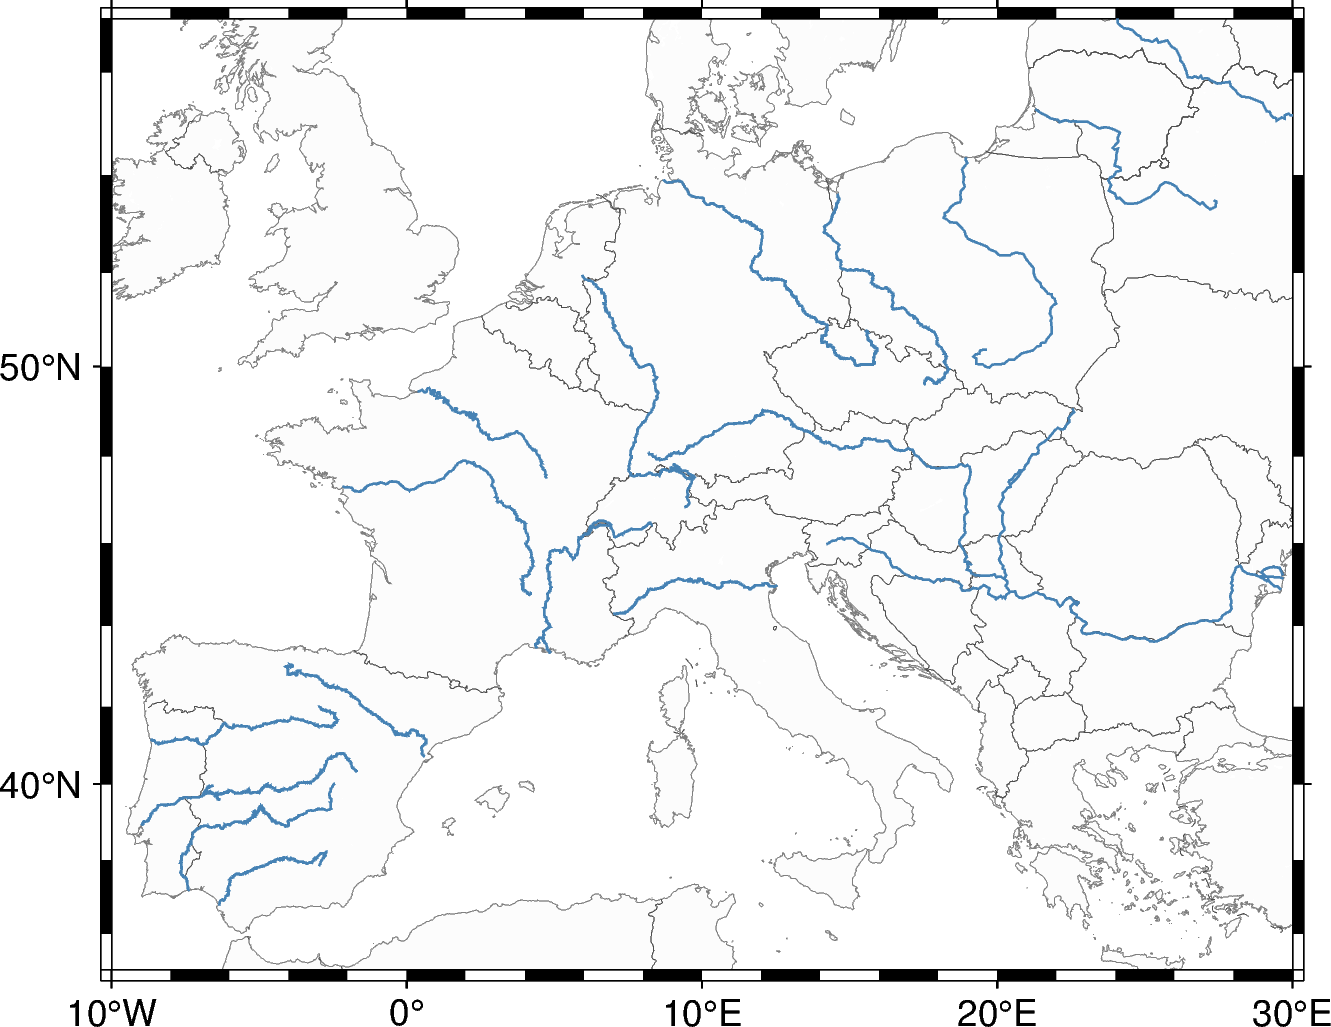

In [4]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 30, 35, 57],
    land="gray99",
    shorelines="1/0.1p,gray50",
    borders="1/0.1,gray30",
    frame=True,
    # rivers="1/1p,lightred",  # Compare with GMT built-in
)

fig.plot(data=gpd_rivers, pen="0.5p,steelblue")

fig.show()

Filter and plot data differently
TODO Split subplot

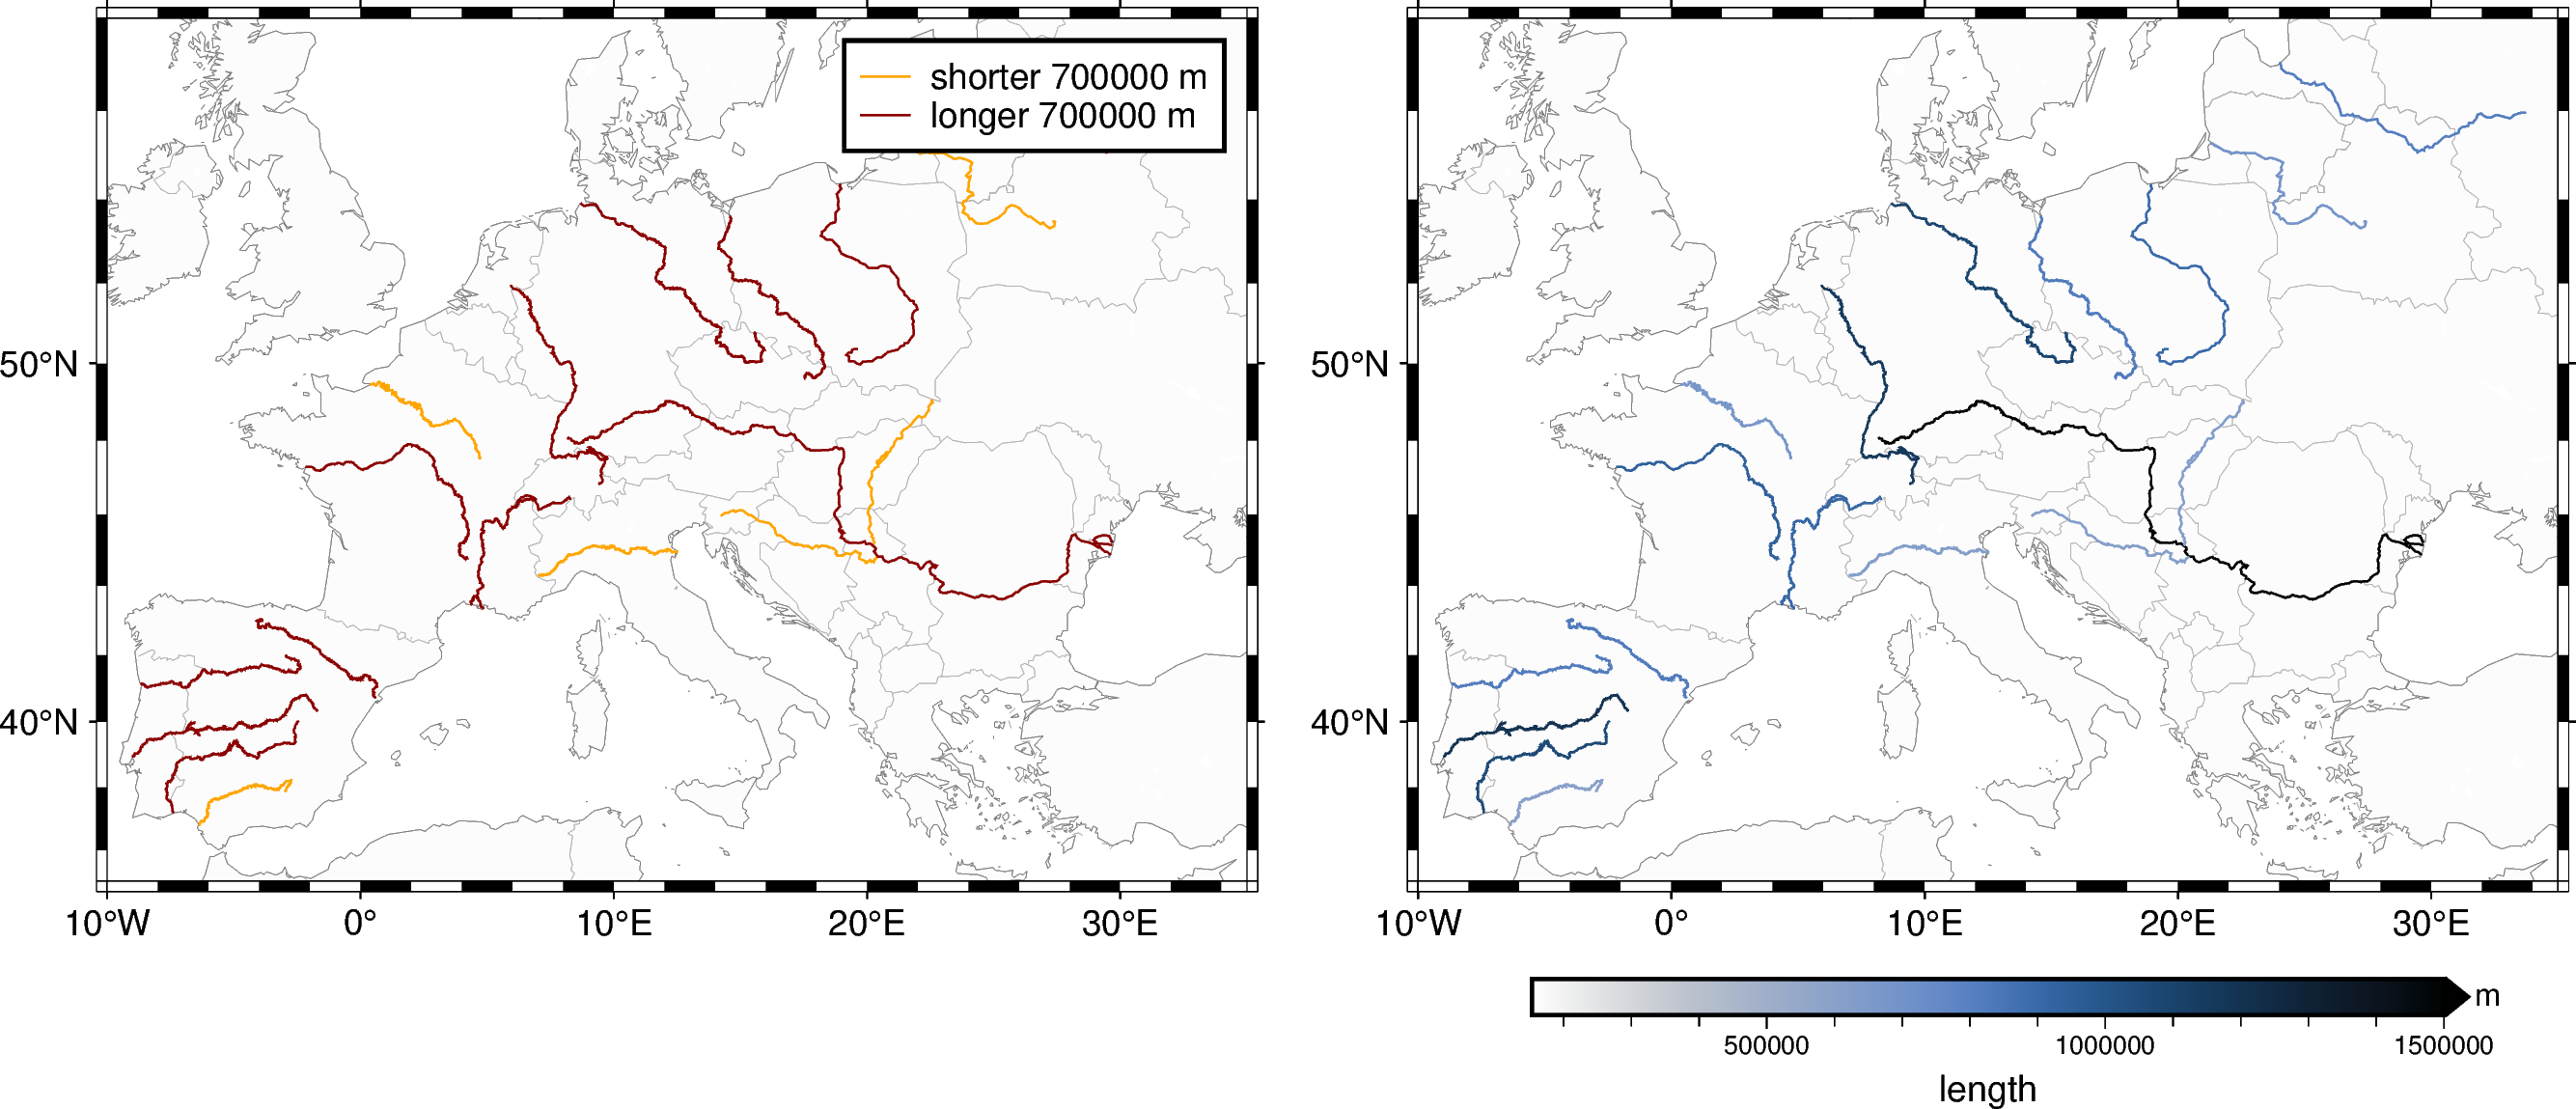

In [5]:
fig = pygmt.Figure()

for i_panel in range(2):
    
    fig.coast(
        projection="M10c", 
        region=[-10, 35, 35, 58],
        land="gray99",
        shorelines="1/0.1p,gray50",
        borders="1/0.01p,gray70",
        frame=True,
    )
    
# -----------------------------------------------------------------------------
    if i_panel==0:
        len_limit = 700000
        gpd_rivers_short = gpd_rivers[gpd_rivers["Shape_Leng"] < len_limit]
        gpd_rivers_long = gpd_rivers[gpd_rivers["Shape_Leng"] > len_limit]
        fig.plot(data=gpd_rivers_short, pen="0.5p,orange", label=f"shorter {len_limit} m")
        fig.plot(data=gpd_rivers_long, pen="0.5p,darkred", label=f"longer {len_limit} m")
        fig.legend()
        
# -----------------------------------------------------------------------------
    if i_panel==1:
        pygmt.makecpt(
            cmap="oslo",
            series=[gpd_rivers.Shape_Leng.min(), 1500000],
            reverse=True,
        )
        for i_river in range(len(gpd_rivers)):
            fig.plot(
                data=gpd_rivers[gpd_rivers.index==i_river],
                zvalue=gpd_rivers.loc[i_river, "Shape_Leng"],
                pen="0.5p",
                cmap=True,
            )
        fig.colorbar(frame=["x+llength", "y+lm"], position="+ef0.2c")
    
# -----------------------------------------------------------------------------
    fig.shift_origin(xshift="w+1.5c")
    
fig.show()

#### 3. `geopandas`: polygone geometry - creating a choropleth map

#### 4. Additional comments

Convert other objects to geopandas objects to make them usable in PyGMT